# Playground for unknown µ, σ

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy.stats import norm
from sklearn.metrics import rand_score, adjusted_rand_score, silhouette_score

from utils import proportion
from gibbs_sampler import gibbs, multigibbs_gibbs, data_gen, make_param_dict, pred_label, score

# from matplotlib.pyplot import figure

plt.rcParams["figure.figsize"] = [10,6]

In [2]:
np.random.seed(10)

In [3]:
mu = [0,4,8,16]
sigmas = [1,1,2,3]
phi = [.2,.2,.2,.4]
k = 4

# Uncomment to view results for random data

# mu = np.random.uniform(low=-50, high=50, size=k)
# sigmas = np.random.uniform(low=0.1, high=10, size=k)
# phi = proportion(k=k, n=100)

n = 1000
y, class_list = data_gen(mu=mu, sigmas=sigmas, phi=phi, n=n)
x = np.linspace(min(y),max(y), 500)

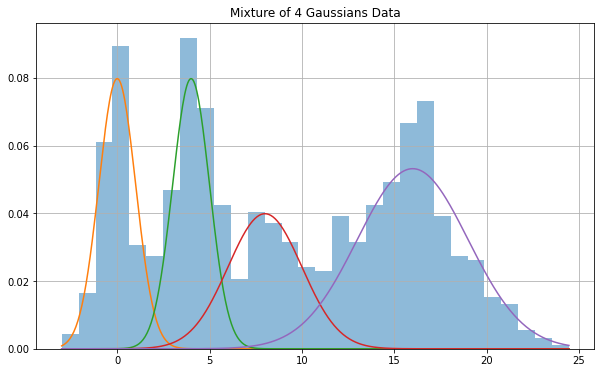

In [4]:
# Create Plot of Data 
plt.hist(y, 30, density=True, alpha=0.5);

for i in range(k):
    plt.plot(x, norm(mu[i], sigmas[i]).pdf(x) * phi[i])

plt.title(f"Mixture of {k} Gaussians Data")
plt.grid()

In [5]:
N_itter = 2000
burnin = 500

In [6]:
[mu_est, sigma_est, phi_est, z_est, trace] = gibbs(y, N_itter, burnin, k=k)

In [7]:
params_dict = make_param_dict(trace=trace)

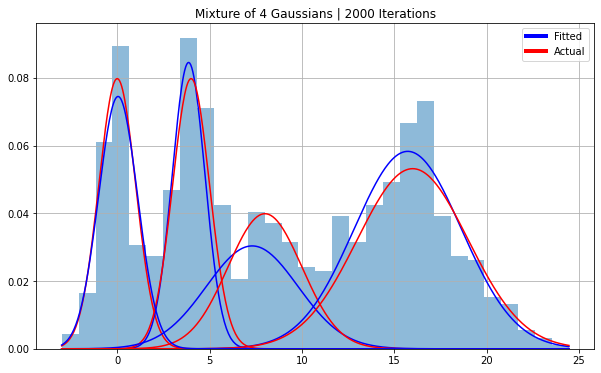

In [8]:
x = np.linspace(min(y), max(y),500)
plt.hist(y, 30, density=True, alpha=0.5);
for i in range(k):
    plt.plot(x, norm(mu[i], sigmas[i]).pdf(x)*phi[i], color="red")
    plt.plot(x, norm(mu_est[i], sigma_est[i]).pdf(x)*phi_est[0][i], color="blue")
plt.title(f"Mixture of 4 Gaussians | {N_itter} Iterations")
legend_elements = [
    Line2D([0], [0], color='blue', lw=4, label='Fitted'),
    Line2D([0], [0], color='red', lw=4, label='Actual')
] 
plt.legend(handles=legend_elements, loc="upper right")
plt.grid()

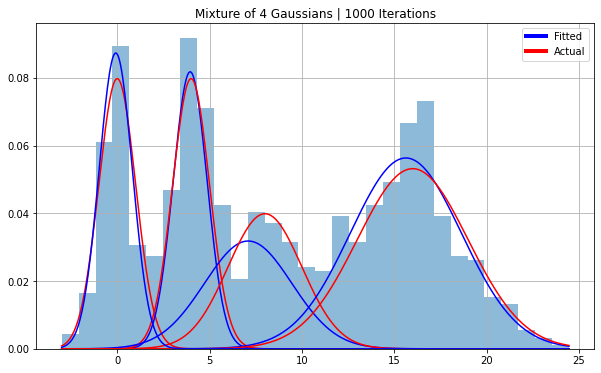

In [9]:
x = np.linspace(min(y), max(y),500)
plt.hist(y, 30, density=True, alpha=0.5);
for i in range(k):
    plt.plot(x, norm(mu[i], sigmas[i]).pdf(x)*phi[i], color="red")
    plt.plot(x, norm(params_dict[f"mu{i}"], params_dict[f"sigma{i}"]).pdf(x)*phi_est[0][i], color="blue")
plt.title(f"Mixture of 4 Gaussians | {n} Iterations")
legend_elements = [
    Line2D([0], [0], color='blue', lw=4, label='Fitted'),
    Line2D([0], [0], color='red', lw=4, label='Actual')
] 
plt.legend(handles=legend_elements, loc="upper right")
plt.grid()

In [10]:
z_est_mean = pred_label(data=y, params_dict=params_dict)

In [11]:
best_model = multigibbs_gibbs(y, k, N_itter, burnin)

# Gibbsampler with multiple initialisation
multi_z_est = best_model[-2]

/home/goirik/.pyenv/versions/3.10.2/envs/semproj/lib/python3.10/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/goirik/.pyenv/versions/3.10.2/envs/semproj/lib/python3.10/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/goirik/.pyenv/versions/3.10.2/envs/semproj/lib/python3.10/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/goirik/.pyenv/versions/3.10.2/envs/semproj/lib/python3.10/site-packages/sklearn/utils/validati

In [12]:
from sklearn.cluster import KMeans

In [13]:
kmeans = KMeans(n_clusters=k)

kmeans.fit(y.reshape(-1,1))

kmean_cat = kmeans.labels_

In [14]:
print("Scores for baseline Gibbs Sampler")
_ = score(y, class_list, z_est)

print("Scores for Gibbs Sampler with burnin")
_ = score(y, class_list, z_est_mean)

print("Scores for Gibbs Sampler with multiple initialisation")
_ = score(y, class_list, multi_z_est)

print("Scores for Sklearn KMean")
_ = score(y, class_list, kmean_cat)

Scores for baseline Gibbs Sampler
Rand Index = 0.891
Adjusted Rand Index = 0.734
Silhouette Score = 0.494
Scores for Gibbs Sampler with burnin
Rand Index = 0.934
Adjusted Rand Index = 0.837
Silhouette Score = 0.602
Scores for Gibbs Sampler with multiple initialisation
Rand Index = 0.920
Adjusted Rand Index = 0.804
Silhouette Score = 0.566
Scores for Sklearn KMean
Rand Index = 0.846
Adjusted Rand Index = 0.610
Silhouette Score = 0.583


/home/goirik/.pyenv/versions/3.10.2/envs/semproj/lib/python3.10/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/goirik/.pyenv/versions/3.10.2/envs/semproj/lib/python3.10/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/goirik/.pyenv/versions/3.10.2/envs/semproj/lib/python3.10/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/goirik/.pyenv/versions/3.10.2/envs/semproj/lib/python3.10/site-packages/sklearn/utils/validati

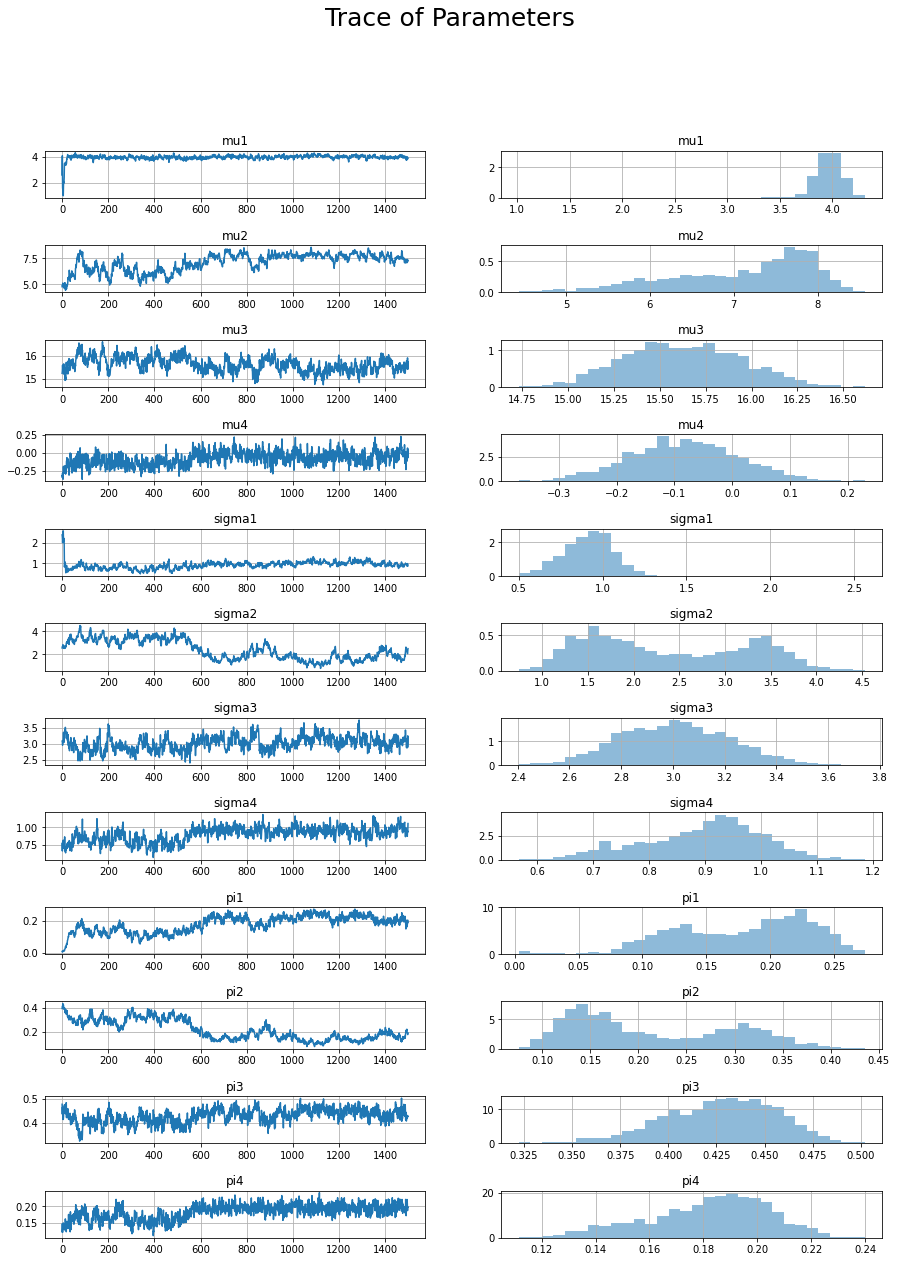

In [15]:
fig, axs = plt.subplots(12,2)
x = range(trace.shape[0])
params = ["mu1", "mu2", "mu3", "mu4", "sigma1", "sigma2", "sigma3", "sigma4", "pi1", "pi2", "pi3", "pi4"]
for i, v in enumerate(params):
    y = trace[:,i]
    axs[i,0].plot(x, y)
    axs[i,0].set_title(v)
    axs[i,1].hist(y, 30, density=True, alpha=0.5);
    axs[i,1].set_title(v)
    axs[i,0].grid()
    axs[i,1].grid()

fig.suptitle("Trace of Parameters", fontsize=25)
fig.set_figheight(20)
fig.set_figwidth(15)
fig.subplots_adjust(hspace=1)